In [1]:
import os
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-11-21 03:19:41--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 142.251.5.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   189MB/s    in 0.4s    

2021-11-21 03:19:41 (189 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense ,Flatten,Dropout,Conv2D,MaxPooling2D

In [3]:
!pip install tensorflow

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

model_1=InceptionV3(input_shape=(150,150,3),
                    include_top=False,
                    weights=None)
model_1.load_weights(local_weights_file)
for layers in model_1.layers:
  layers.trainable=False

last_layer = model_1.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
x=Flatten()(last_output)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(model_1.input,x)
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=RMSprop(learning_rate=0.01))



In [6]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 133MB/s]


In [7]:
train_1=ImageDataGenerator(rescale=1/255,
                         rotation_range=40,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True)
test_1=ImageDataGenerator(rescale=1/255,
                         rotation_range=40,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True)
train=train_1.flow_from_directory(train_dir,
                                  target_size=(150,150),
                                  class_mode='binary',
                                  batch_size=20)
test=test_1.flow_from_directory(validation_dir,
                                  target_size=(150,150),
                                  class_mode='binary',
                                  batch_size=20)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
a=model.fit(train,epochs=20,steps_per_epoch=100,verbose=2,validation_data=test,validation_steps=50)

Epoch 1/20
100/100 - 63s - loss: 14.6015 - accuracy: 0.8130 - val_loss: 0.3860 - val_accuracy: 0.8670 - 63s/epoch - 626ms/step
Epoch 2/20
100/100 - 29s - loss: 0.9718 - accuracy: 0.8445 - val_loss: 1.0871 - val_accuracy: 0.8420 - 29s/epoch - 291ms/step
Epoch 3/20
100/100 - 29s - loss: 0.7472 - accuracy: 0.8640 - val_loss: 0.4237 - val_accuracy: 0.9060 - 29s/epoch - 291ms/step
Epoch 4/20
100/100 - 29s - loss: 0.7829 - accuracy: 0.8710 - val_loss: 0.2173 - val_accuracy: 0.9130 - 29s/epoch - 291ms/step
Epoch 5/20
100/100 - 29s - loss: 0.6374 - accuracy: 0.8960 - val_loss: 5.5580 - val_accuracy: 0.7030 - 29s/epoch - 291ms/step
Epoch 6/20
100/100 - 29s - loss: 0.7806 - accuracy: 0.8895 - val_loss: 0.7429 - val_accuracy: 0.9000 - 29s/epoch - 291ms/step
Epoch 7/20
100/100 - 29s - loss: 0.6569 - accuracy: 0.8970 - val_loss: 0.7702 - val_accuracy: 0.8400 - 29s/epoch - 292ms/step
Epoch 8/20
100/100 - 29s - loss: 0.4565 - accuracy: 0.9110 - val_loss: 0.3453 - val_accuracy: 0.9260 - 29s/epoch - 29

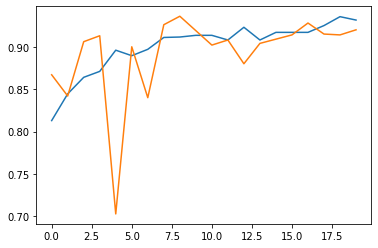

In [9]:
import matplotlib.pyplot as plt 
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])

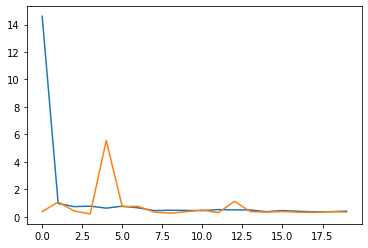

In [13]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])

In [11]:
model.save('dropout_cat_dog.h5')